### Importing librarys and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
data = pd.read_csv('INvideos.csv')

In [4]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


In [6]:
data.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

### Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition

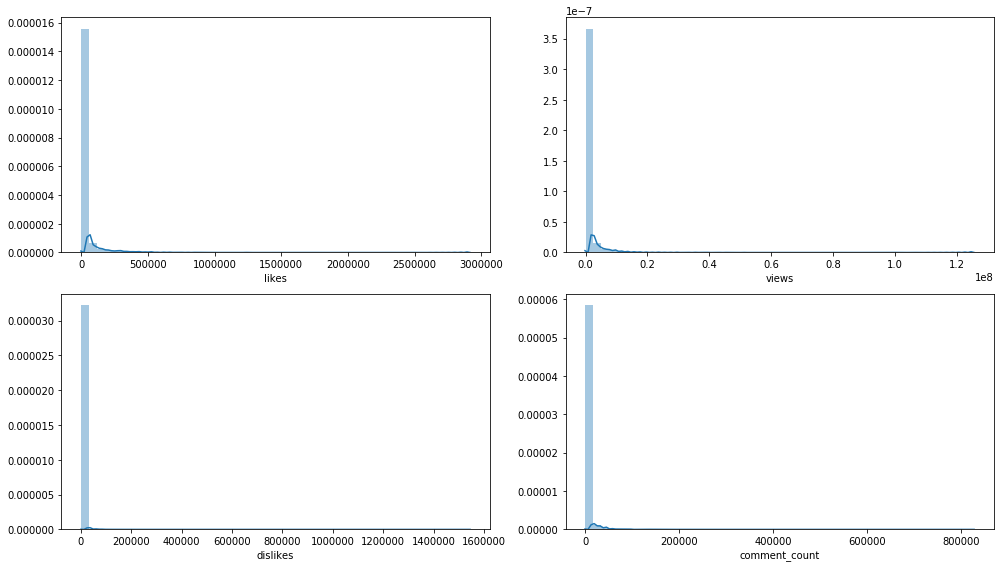

In [7]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

sns.distplot((data['likes']), ax = axes[0][0])

sns.distplot((data['views']), ax = axes[0][1])

sns.distplot((data['dislikes']), ax = axes[1][0])

sns.distplot((data['comment_count']), ax = axes[1][1])

plt.tight_layout()
plt.show()

as we can see from above likes, views, dislikes and comment_count arenot normally distributes, so we transform these values

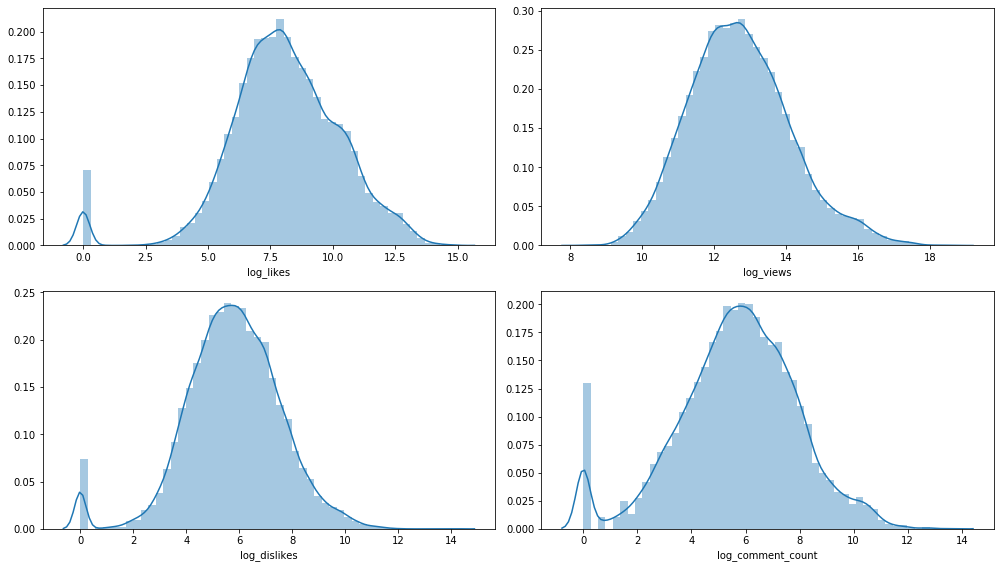

In [8]:
data['log_likes'] = (np.log(data['likes'] + 1))
data['log_views'] = (np.log(data['views'] + 1))
data['log_dislikes'] = (np.log(data['dislikes'] + 1))
data['log_comment_count'] = (np.log(data['comment_count'] + 1))

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

sns.distplot((data['log_likes']), ax = axes[0][0])

sns.distplot((data['log_views']), ax = axes[0][1])

sns.distplot((data['log_dislikes']), ax = axes[1][0])

sns.distplot((data['log_comment_count']), ax = axes[1][1])

plt.tight_layout()
plt.show()

In [9]:
np.sort(data.category_id.unique().tolist())

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43])

In [10]:
data['category_name'] = np.nan

data.loc[(data["category_id"] == 1),"category_name"] = 'Film and Animation'
data.loc[(data["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
data.loc[(data["category_id"] == 10),"category_name"] = 'Music'
data.loc[(data["category_id"] == 15),"category_name"] = 'Pets and Animals'
data.loc[(data["category_id"] == 17),"category_name"] = 'Sport'
data.loc[(data["category_id"] == 19),"category_name"] = 'Travel and Events'
data.loc[(data["category_id"] == 20),"category_name"] = 'Gaming'
data.loc[(data["category_id"] == 22),"category_name"] = 'People and Blogs'
data.loc[(data["category_id"] == 23),"category_name"] = 'Comedy'
data.loc[(data["category_id"] == 24),"category_name"] = 'Entertainment'
data.loc[(data["category_id"] == 25),"category_name"] = 'News and Politics'
data.loc[(data["category_id"] == 26),"category_name"] = 'How to and Style'
data.loc[(data["category_id"] == 27),"category_name"] = 'Education'
data.loc[(data["category_id"] == 28),"category_name"] = 'Science and Technology'
data.loc[(data["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
data.loc[(data["category_id"] == 30),"category_name"] = 'News & Politics'
data.loc[(data["category_id"] == 43),"category_name"] = 'others'

In [11]:
a = data.category_name.value_counts()
a

Entertainment               16712
News and Politics            5241
Music                        3858
Comedy                       3429
People and Blogs             2624
Film and Animation           1658
Education                    1227
How to and Style              845
Sport                         731
Science and Technology        552
others                        205
Non Profits and Activism      105
Cars and Vehicles              72
Gaming                         66
News & Politics                16
Travel and Events               8
Pets and Animals                3
Name: category_name, dtype: int64

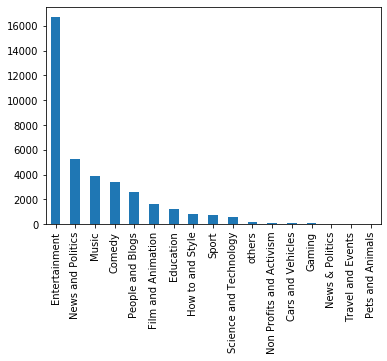

In [12]:
a.plot.bar()

### Looking the Views, likes, dislikes distribuition by category_name's

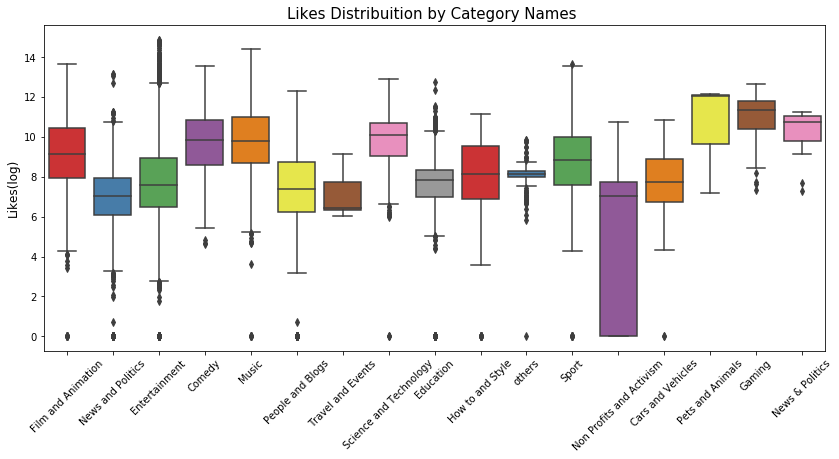

In [13]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x  ='category_name', y = 'log_likes', data = data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(),rotation = 45)
g.set_title("Likes Distribuition by Category Names ", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Likes(log)", fontsize = 12)
plt.show()

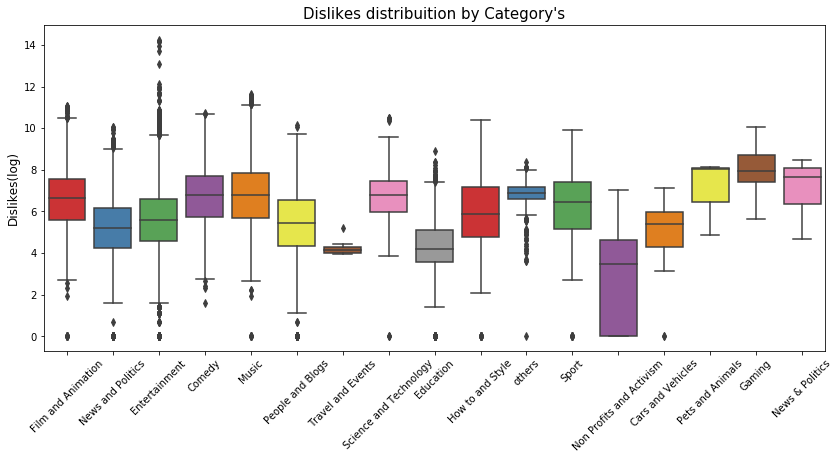

In [14]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x = 'category_name', y = 'log_dislikes', data = data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(),rotation = 45)
g.set_title("Dislikes distribuition by Category's", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Dislikes(log)", fontsize = 12)
plt.show()

### Engagement Features 

I will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

In [15]:
data['like_rate'] =  data['likes'] / data['views'] * 100
data['dislike_rate'] =  data['dislikes'] / data['views'] * 100
data['comment_rate'] =  data['comment_count'] / data['views'] * 100

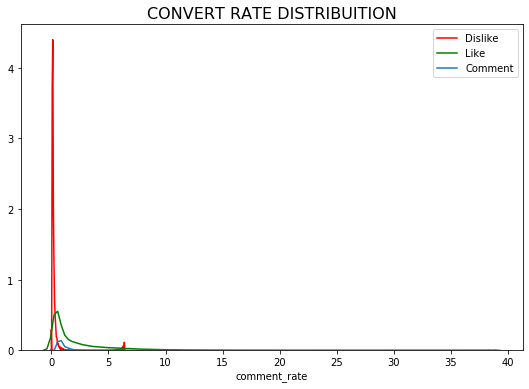

In [16]:

plt.figure(figsize = (9,6))

g1 = sns.distplot(data['dislike_rate'], color = 'red', hist = False, label = "Dislike")
g1 = sns.distplot(data['like_rate'], color = 'green',hist = False, label = "Like")
g1 = sns.distplot(data['comment_rate'], hist = False, label = "Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize = 16)
plt.legend()
plt.show()

Very meaningful distribuition! Like x Dislikes rate have interesting differences

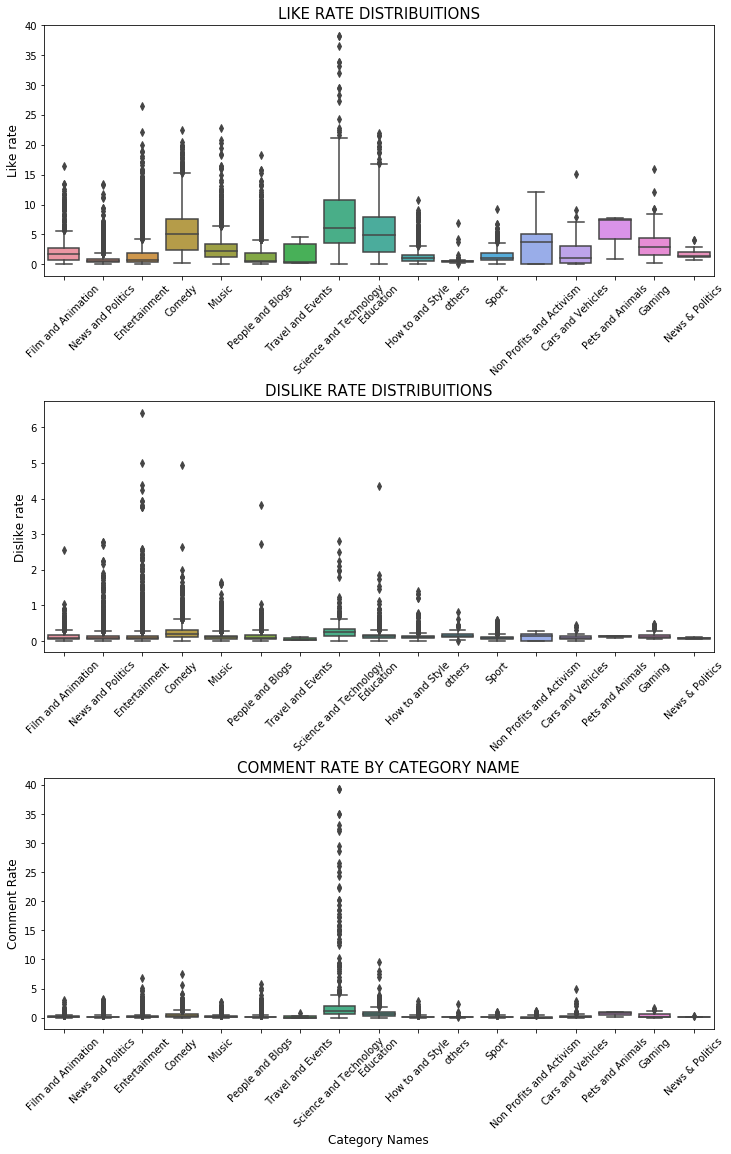

In [17]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g = sns.boxplot(x = 'category_name', y = 'like_rate',  data = data)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Like rate", fontsize = 12)

plt.subplot(312)
g1 = sns.boxplot(y = 'dislike_rate', x = 'category_name', data = data)
g1.set_xticklabels(g.get_xticklabels(), rotation = 45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize = 15)
g1.set_xlabel("", fontsize = 12)
g1.set_ylabel("Dislike rate", fontsize = 12)

plt.subplot(313)
g2 = sns.boxplot(y = 'comment_rate', x = 'category_name', data = data)
g2.set_xticklabels(g.get_xticklabels(), rotation = 45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize = 15)
g2.set_xlabel("Category Names", fontsize = 12)
g2.set_ylabel("Comment Rate", fontsize = 12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see that the Dislike rate and comment rate is very low in almost all categories but some outliers in Entertainment and News & Politics that we can might can consider "Normal"

The mean of dislike and comment distribuition is less than 5%.

#### Looking through the anothers categoricals variables 
##### We have the variables:

- Comments Disable
- Rating disable
- Video error

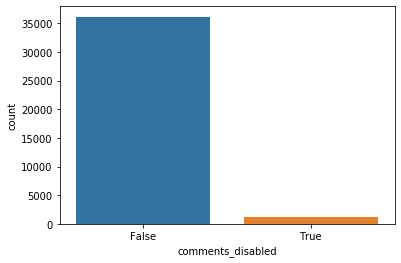

In [18]:
sns.countplot(data.comments_disabled)

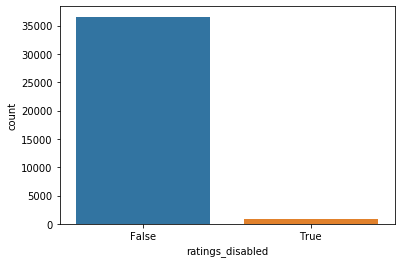

In [19]:
sns.countplot(data.ratings_disabled)

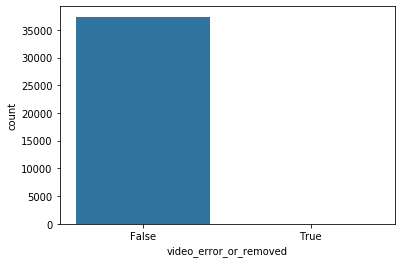

In [20]:
sns.countplot(data.video_error_or_removed)

### Let's look the kde of this variables separated to deep understand them

C:\Users\rahul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rahul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


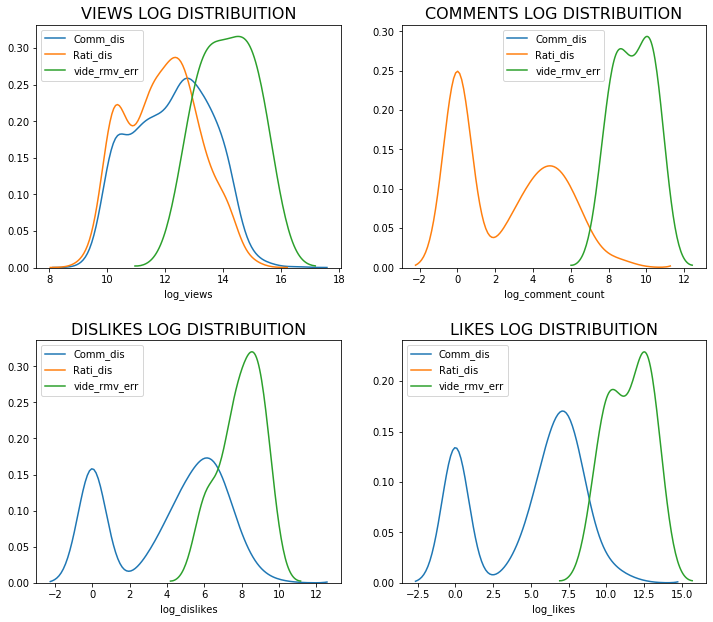

In [21]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(data[data['comments_disabled'] == True]['log_views'], 
                  hist = False, label = 'Comm_dis')
g1 = sns.distplot(data[data['ratings_disabled'] == True]['log_views'], 
                  hist = False, label = 'Rati_dis')
g1 = sns.distplot(data[data['video_error_or_removed'] == True]['log_views'], 
                  hist = False, label = 'vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(data[data['comments_disabled'] == True]['log_comment_count'],
                  hist = False, label = 'Comm_dis')
g2 = sns.distplot(data[data['ratings_disabled'] == True]['log_comment_count'], 
                  hist = False, label = 'Rati_dis')
g2 = sns.distplot(data[data['video_error_or_removed'] == True]['log_comment_count'], 
                  hist = False, label = 'vide_rmv_err')
g2.set_title("COMMENTS LOG DISTRIBUITION", fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(data[data['comments_disabled'] == True]['log_dislikes'], 
                  hist = False, label = 'Comm_dis')
g3 = sns.distplot(data[data['ratings_disabled'] == True]['log_dislikes'], 
                  hist = False, label = 'Rati_dis')
g3 = sns.distplot(data[data['video_error_or_removed'] == True]['log_dislikes'], 
                  hist = False, label = 'vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize = 16)

plt.subplot(224)
g4 = sns.distplot(data[data['comments_disabled'] == True]['log_likes'], 
                  hist = False, label = 'Comm_dis')
g4 = sns.distplot(data[data['ratings_disabled'] == True]['log_likes'], 
                  hist = False, label = 'Rati_dis')
g4 = sns.distplot(data[data['video_error_or_removed'] == True]['log_likes'], 
                  hist = False, label = 'vide_rmv_err')
g4.set_title('LIKES LOG DISTRIBUITION', fontsize = 16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

### Analysing the Correlation Matrix of the numerical variables

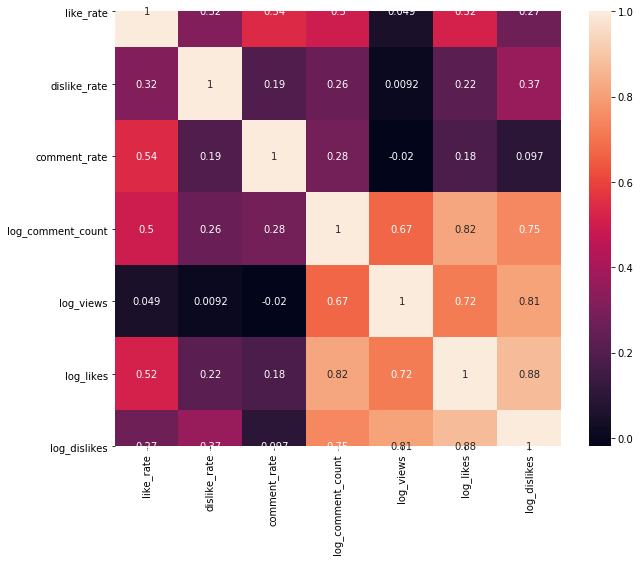

In [22]:

plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(data[['like_rate', 'dislike_rate', 'comment_rate', 'log_comment_count',
         'log_views','log_likes','log_dislikes', "category_name"]].corr(), annot = True)
plt.show()

### I will start creating some features from texts using Title and Tags columns

In [23]:
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer

In [24]:
eng_stopwords = set(stopwords.words("english"))

In [25]:
#Word count in each comment:
data['count_word'] = data["title"].apply(lambda x: len(str(x).split()))
data['count_word_tags'] = data["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word'] = data["title"].apply(lambda x: len(set(str(x).split())))
data['count_unique_word_tags'] = data["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters'] = data["title"].apply(lambda x: len(str(x)))
data['count_letters_tags'] = data["tags"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
data["count_punctuations_tags"] = data["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
data["count_words_upper_tags"] = data["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
data["count_words_title_tags"] = data["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
data["count_stopwords_tags"] = data["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
data["mean_word_len"] = data["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
data["mean_word_len_tags"] = data["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [26]:
#derived features
#Word count percent in each comment:
data['word_unique_percent'] = data['count_unique_word'] * 100 / data['count_word']
data['word_unique_percent_tags'] = data['count_unique_word_tags'] * 100 / data['count_word_tags']

#Punct percent in each comment:
data['punct_percent'] = data['count_punctuations'] * 100 / data['count_word']
data['punct_percent_tags'] = data['count_punctuations_tags'] * 100 / data['count_word_tags']

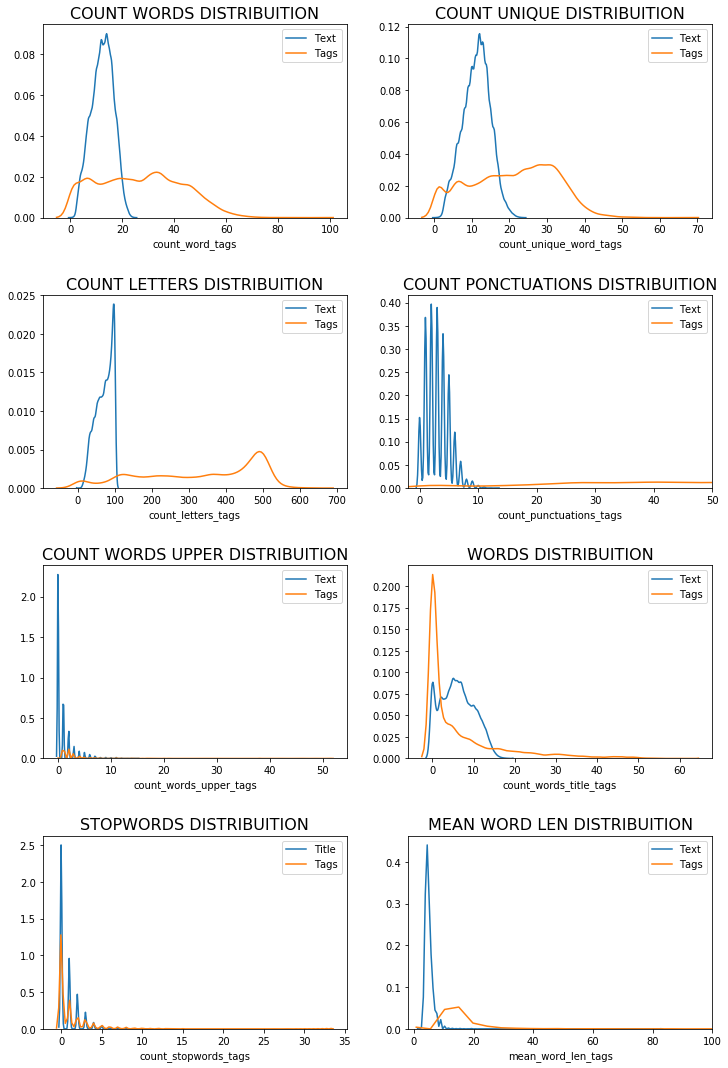

In [27]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(data['count_word'], 
                  hist = False, label = 'Text')
g1 = sns.distplot(data['count_word_tags'], 
                  hist = False, label = 'Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize = 16)

plt.subplot(422)
g2 = sns.distplot(data['count_unique_word'],
                  hist = False, label = 'Text')
g2 = sns.distplot(data['count_unique_word_tags'], 
                  hist = False, label = 'Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize = 16)

plt.subplot(423)
g3 = sns.distplot(data['count_letters'], 
                  hist = False, label = 'Text')
g3 = sns.distplot(data['count_letters_tags'], 
                  hist = False, label = 'Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize = 16)

plt.subplot(424)
g4 = sns.distplot(data["count_punctuations"], 
                  hist = False, label = 'Text')
g4 = sns.distplot(data["count_punctuations_tags"], 
                  hist = False, label = 'Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize = 16)

plt.subplot(425)
g5 = sns.distplot(data["count_words_upper"] , 
                  hist = False, label = 'Text')
g5 = sns.distplot(data["count_words_upper_tags"] , 
                  hist = False, label = 'Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize = 16)

plt.subplot(426)
g6 = sns.distplot(data["count_words_title"], 
                  hist = False, label = 'Text')
g6 = sns.distplot(data["count_words_title_tags"], 
                  hist = False, label = 'Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize = 16)

plt.subplot(427)
g7 = sns.distplot(data["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(data["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize = 16)

plt.subplot(428)
g8 = sns.distplot(data["mean_word_len"], 
                  hist = False, label = 'Text')
g8 = sns.distplot(data["mean_word_len_tags"], 
                  hist = False, label = 'Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize = 16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

### Have the Punctuations title and tags any relation with views, likes, dislikes comments? 

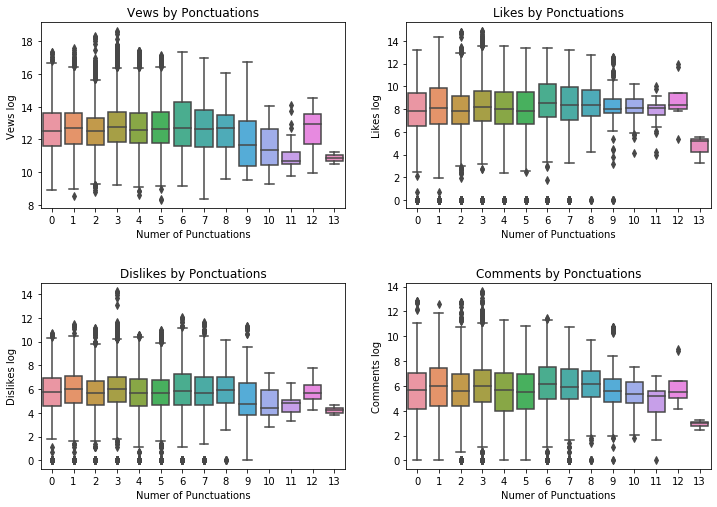

In [28]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x = 'count_punctuations', y = 'log_views', data = data)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x = 'count_punctuations', y = 'log_likes', data = data)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x = 'count_punctuations', y = 'log_dislikes', data = data)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x = 'count_punctuations', y = 'log_comment_count', data = data)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### The same view using Tags punctuations values

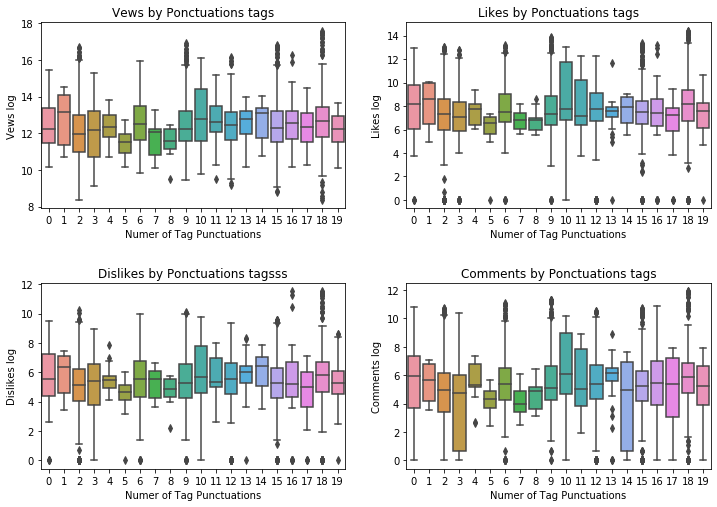

In [29]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x = 'count_punctuations_tags', y = 'log_views', data = data[data['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x = 'count_punctuations_tags', y = 'log_likes', data = data[data['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x = 'count_punctuations_tags', y = 'log_dislikes', data = data[data['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x = 'count_punctuations_tags', y = 'log_comment_count', data = data[data['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Let's verify the correlation of title and tags values with views

- exploring the Correlation matrix to see if have any interesting relation

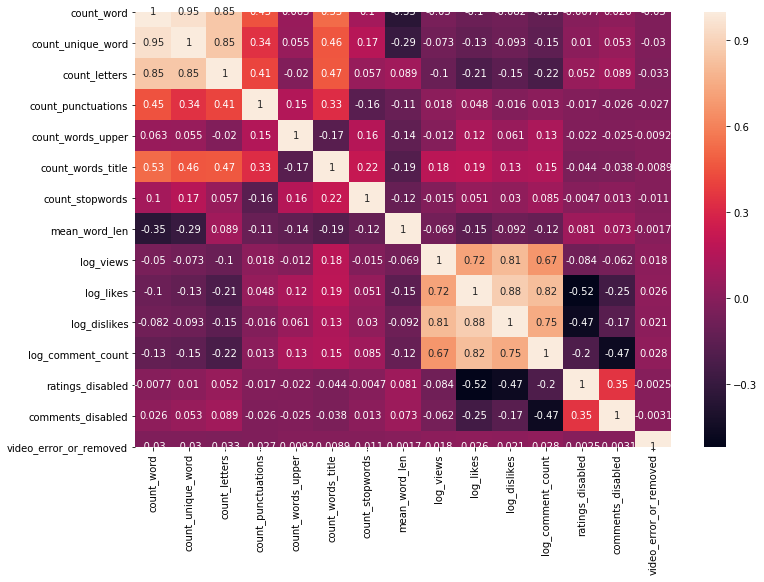

In [30]:
plt.figure(figsize = (12,8))

sns.heatmap(data[['count_word', 'count_unique_word', 'count_letters',
                     "count_punctuations", "count_words_upper", "count_words_title", 
                     "count_stopwords", "mean_word_len", 
                     'log_views', 'log_likes','log_dislikes','log_comment_count',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot = True)
plt.show()

### Visualizing the Word Cloud of Tagged videos 

- Ratings Disable 
- comments Disable
- Video Error or Removed

#### Rating Disabled

In [31]:
plt.rcParams['font.size']= 15              
plt.rcParams['savefig.dpi']= 100         
plt.rcParams['figure.subplot.bottom']= .1

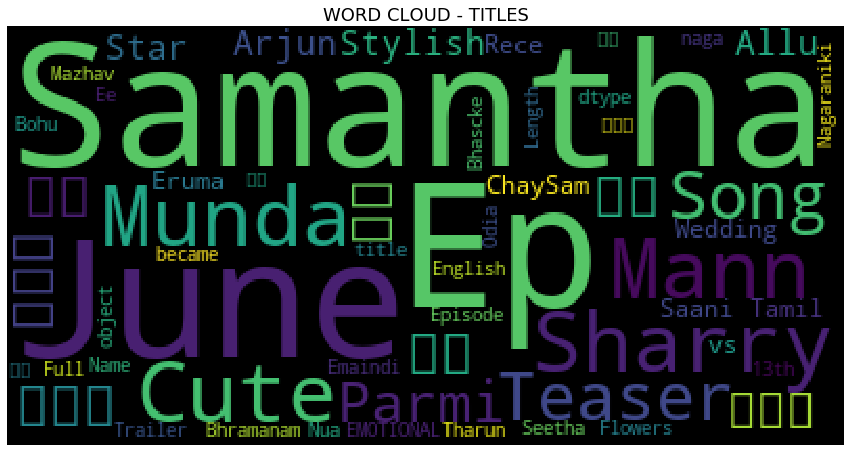

In [32]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color = 'black',
                          stopwords = stopwords,
                          max_words = 1000,
                          max_font_size = 120, 
                          random_state = 42
                         ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Comments Disabled

### General Title Word Cloud

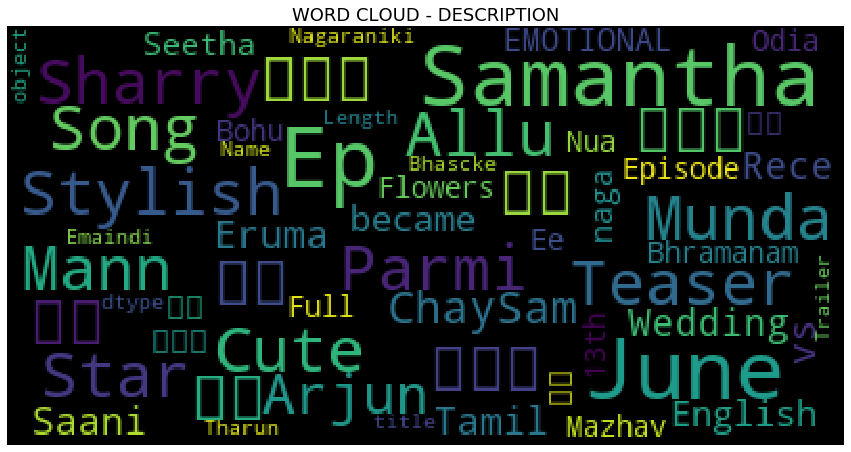

In [33]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color = 'black',
                          stopwords = stopwords,
                          max_words = 150,
                          max_font_size = 40, 
                          random_state = 42
                         ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

### Visualizing the WordCloud of Description

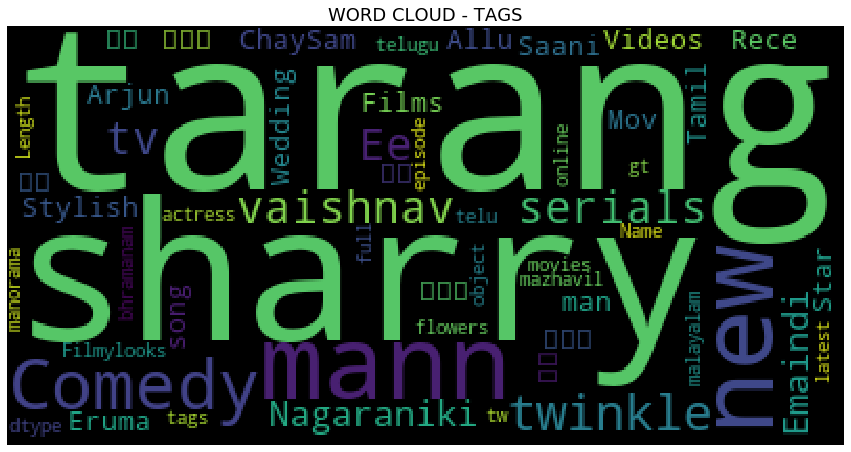

In [34]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color = 'black',
                          stopwords = stopwords,
                          max_words = 1200,
                          max_font_size = 120, 
                          random_state = 42
                         ).generate(str(data['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

In [35]:
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
12    5754
5     5666
3     5436
1     5389
2     4766
Name: month, dtype: int64


C:\Users\rahul\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


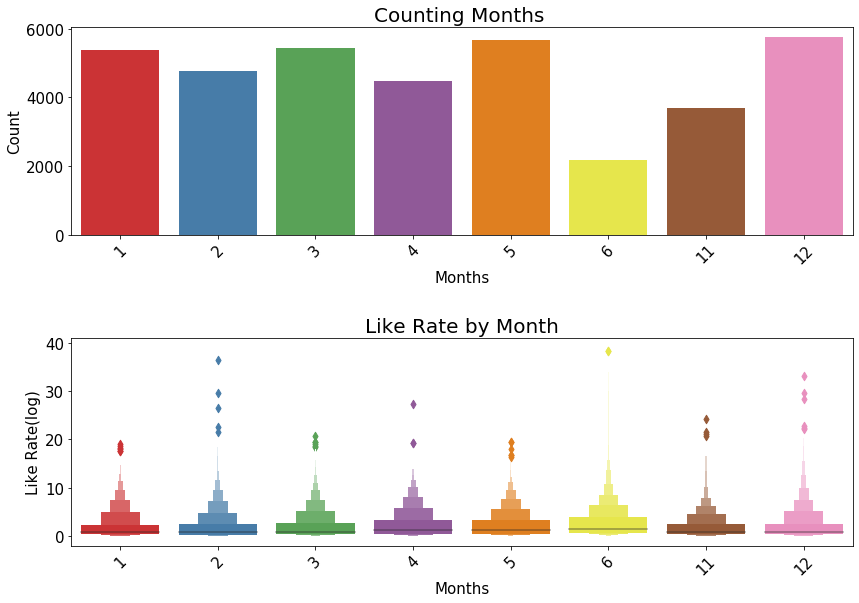

In [36]:
data['month'] = data['publish_time'].dt.month

print("Category Name count")
print(data['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data = data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Counting Months ", fontsize = 20)
g.set_xlabel("Months", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

plt.subplot(212)
g1 = sns.lvplot(x = 'month', y = 'like_rate', data = data, palette = "Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation = 45)
g1.set_title("Like Rate by Month", fontsize = 20)
g1.set_xlabel("Months", fontsize = 15)
g1.set_ylabel("Like Rate(log)", fontsize = 15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

### Let's extract the hour value of datetime'


In [37]:
# separates date and time into two columns from 'publish_time' column
data.insert(4, 'publish_date', data['publish_time'].dt.date)
data['publish_time'] = data['publish_time'].dt.time
data[['hour','min','sec']] = data['publish_time'].astype(str).str.split(':', expand = True).astype(int)

### Knowning the Hour feature


TOP 5 Hour values
14    2838
12    2782
13    2631
6     2323
11    2295
Name: hour, dtype: int64


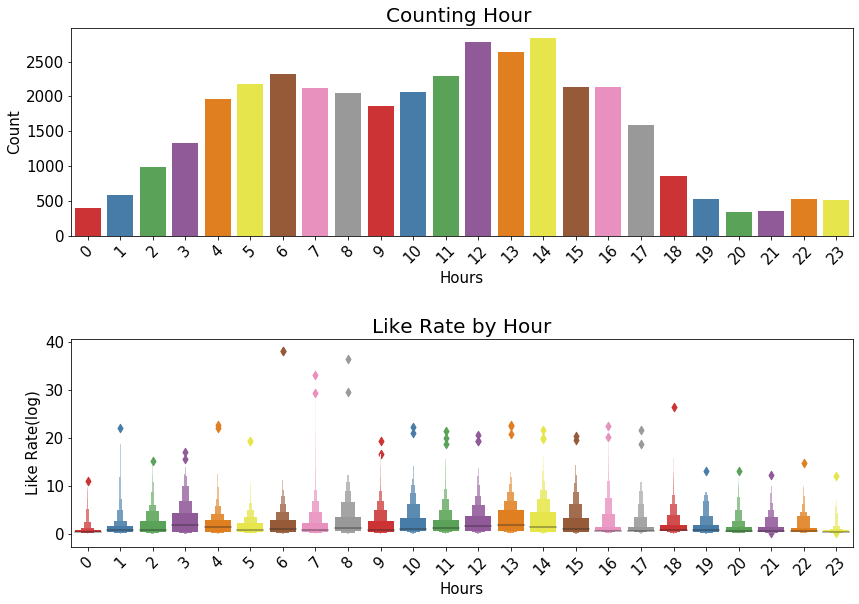

In [38]:
print("TOP 5 Hour values")
print(data['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data = data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Counting Hour ", fontsize = 20)
g.set_xlabel("Hours", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

plt.subplot(212)
g1 = sns.lvplot(x = 'hour', y = 'like_rate', data = data, palette = "Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation = 45)
g1.set_title("Like Rate by Hour", fontsize = 20)
g1.set_xlabel("Hours", fontsize = 15)
g1.set_ylabel("Like Rate(log)", fontsize = 15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()